<a href="https://colab.research.google.com/github/Aggarwal13/ML_MODELS/blob/main/RESEARCH_PAPER_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [2]:
df=pd.read_csv("earth.csv")

In [3]:
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",NaN,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",NaN,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece


In [4]:
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [5]:
df.drop("location",axis=1,inplace=True)
df.drop("title",axis=1,inplace=True)
df.drop("date_time",axis=1,inplace=True)
df.drop("net",axis=1,inplace=True)
df.drop("magType",axis=1,inplace=True)



In [8]:
df.drop("continent",axis=1,inplace=True)
df.drop("country",axis=1,inplace=True)

In [11]:
df.drop("alert",axis=1,inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 86.1 KB


In [16]:
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
tsunami      0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
dtype: int64

In [13]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


In [14]:
features=["magnitude",	"cdi"	,"mmi"	,	"sig"	,"nst"	,"dmin",	"gap"	,"depth"	,"latitude"	,"longitude"]
x=df[features]
y=df.tsunami


<Axes: xlabel='tsunami'>

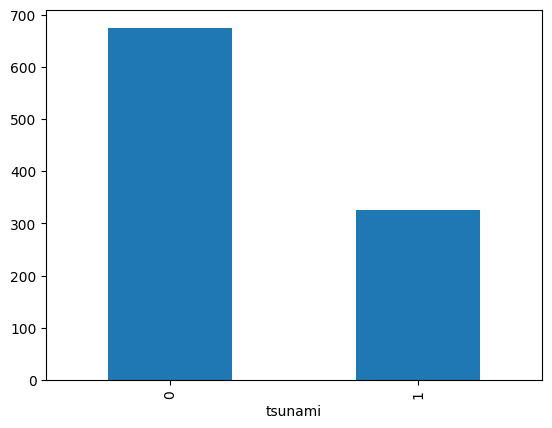

In [17]:
df.tsunami.value_counts().plot(kind='bar')

In [18]:
#KNN
max_features=3
model=KNeighborsClassifier()
kfold=model_selection.KFold(n_splits=10)
results=model_selection.cross_val_score(model,x,y,cv=kfold)
print("acuraccy",round(results.mean()*100,2))

acuraccy 72.0


In [19]:
#DECISION TREE
max_features=3
kfold=model_selection.KFold(n_splits=10)
model=DecisionTreeClassifier(criterion='gini')
results=model_selection.cross_val_score(model,x,y,cv=kfold)
print("acuraccy",round(results.mean()*100,2))

acuraccy 86.3


CONCEPT OF BAGGING

In [20]:

kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for BaggingClassifier:", round(results.mean()*100, 2)) #80%

Accuracy for BaggingClassifier: 89.1


In [21]:
from sklearn.ensemble import RandomForestClassifier

kfolds=model_selection.KFold(10)
num_trees=200
model=RandomForestClassifier(n_estimators=num_trees)
results=model_selection.cross_val_score(model,x,y,cv=kfolds)
print("acuraccy",round(results.mean()*100,2))

acuraccy 90.4


In [22]:
from sklearn.ensemble import ExtraTreesClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = ExtraTreesClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for ExtraTreesClassifier:", round(results.mean()*100, 2)) #78.5

Accuracy for ExtraTreesClassifier: 88.4


CONCEPT OF BOOSTING

In [23]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for AdaBoostClassifier:", round(results.mean()*100, 2))

Accuracy for AdaBoostClassifier: 86.6


In [24]:
from sklearn.ensemble import GradientBoostingClassifier


num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for GradientBoostingClassifier:", round(results.mean()*100, 2))

Accuracy for GradientBoostingClassifier: 88.7


In [25]:
import xgboost as xgb


num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = xgb.XGBClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for XGBoost:", round(results.mean()*100, 2))

Accuracy for XGBoost: 89.6


CONCEPT OF VOTING CLASSIFIER

In [27]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold=model_selection.KFold(n_splits=10)

estimators=[]

model1=LogisticRegression(solver='lbfgs', max_iter=10000)
estimators.append(('logistic',model1))

model2=SVC()
estimators.append(('SVC',model2))

model3=DecisionTreeClassifier()
estimators.append(('DecisionTreeClassifier',model3))

ensemble=VotingClassifier(estimators)

results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print("Accuracy for VotingClassifier:", round(results.mean()*100, 2))

Accuracy for VotingClassifier: 83.8


In [30]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

kfold=model_selection.KFold(n_splits=10)

estimators=[]
num_tress=500
model1=RandomForestClassifier(n_estimators=num_trees)
estimators.append(('RFC',model1))

model2=xgb.XGBClassifier(n_estimators=num_trees)
estimators.append(('XGB',model2))

cart=DecisionTreeClassifier()
model3=BaggingClassifier(n_estimators=num_trees,estimator=cart)
estimators.append(('BaggedDecisionTreeClassifier',model3))

ensemble=VotingClassifier(estimators)

results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print("Accuracy for VotingClassifier:", round(results.mean()*100, 2))

Accuracy for VotingClassifier: 90.5


In [32]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

kfold=model_selection.KFold(n_splits=10)

estimators=[]
num_tress=500
model1=RandomForestClassifier(n_estimators=num_trees)
estimators.append(('RFC',model1))

model2=xgb.XGBClassifier(n_estimators=num_trees)
estimators.append(('XGB',model2))



ensemble=VotingClassifier(estimators)

results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print("Accuracy for VotingClassifier:", round(results.mean()*100, 2))

Accuracy for VotingClassifier: 90.3
